# DAB 103: Analytical Tools & Decision Making - Project 1

## Exploratory Data Analysis of Credit Card Payment Default

### Group# 1
### Team Members:

* Ambily Treesa Varghese
* Srilakshmi Gummadidala
* Jibina Francis
* Satya Akhil Govvala
* Dileep Sathyan

## Import the libraries and read the dataframe

In [89]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataframe

file_name = 'default_of_credit_card_clients.xls'

df_raw = pd.read_excel(file_name, skiprows=1)
df_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Set ID as index field

In [3]:
df_raw = df_raw.set_index("ID")
df_raw.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Making sure the type of the dataframe

type(df_raw)

pandas.core.frame.DataFrame

In [5]:
# Check the shape of the dataframe

df_raw.shape

(30000, 24)

In [6]:
# Display the last 5 records in the dataframe

df_raw.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
# Check the column names in the dataframe

df_raw.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Renaming the column names appropriately

In [8]:
col_names= {'LIMIT_BAL': 'CREDIT_LIMIT',
            'SEX': 'GENDER',
            'MARRIAGE': 'MARITAL_STATUS',
            'PAY_0' : 'REPAY_STATUS_SEP',
            'PAY_2' : 'REPAY_STATUS_AUG',
            'PAY_3' : 'REPAY_STATUS_JUL',
            'PAY_4' : 'REPAY_STATUS_JUN',
            'PAY_5' : 'REPAY_STATUS_MAY',
            'PAY_6' : 'REPAY_STATUS_APR',
            'BILL_AMT1' : 'BILL_STMT_AMT_SEP',
            'BILL_AMT2' : 'BILL_STMT_AMT_AUG',
            'BILL_AMT3' : 'BILL_STMT_AMT_JUL',
            'BILL_AMT4' : 'BILL_STMT_AMT_JUN',
            'BILL_AMT5' : 'BILL_STMT_AMT_MAY',
            'BILL_AMT6' : 'BILL_STMT_AMT_APR',
            'PAY_AMT1': 'PAY_AMT_SEP',
            'PAY_AMT2': 'PAY_AMT_AUG', 
            'PAY_AMT3': 'PAY_AMT_JUL', 
            'PAY_AMT4': 'PAY_AMT_JUN', 
            'PAY_AMT5': 'PAY_AMT_MAY', 
            'PAY_AMT6': 'PAY_AMT_APR',
            'default payment next month': 'IS_DEFAULT'}

df_raw = df_raw.rename(columns=col_names)
df_raw.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# View a certain record in the dataframe

df_raw.iloc[10,]

CREDIT_LIMIT         200000
GENDER                    2
EDUCATION                 3
MARITAL_STATUS            2
AGE                      34
REPAY_STATUS_SEP          0
REPAY_STATUS_AUG          0
REPAY_STATUS_JUL          2
REPAY_STATUS_JUN          0
REPAY_STATUS_MAY          0
REPAY_STATUS_APR         -1
BILL_STMT_AMT_SEP     11073
BILL_STMT_AMT_AUG      9787
BILL_STMT_AMT_JUL      5535
BILL_STMT_AMT_JUN      2513
BILL_STMT_AMT_MAY      1828
BILL_STMT_AMT_APR      3731
PAY_AMT_SEP            2306
PAY_AMT_AUG              12
PAY_AMT_JUL              50
PAY_AMT_JUN             300
PAY_AMT_MAY            3738
PAY_AMT_APR              66
IS_DEFAULT                0
Name: 11, dtype: int64

In [10]:
df_raw.loc[11,'AGE']

34

In [11]:
# Check the columns and datatypes in the dataframne

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CREDIT_LIMIT       30000 non-null  int64
 1   GENDER             30000 non-null  int64
 2   EDUCATION          30000 non-null  int64
 3   MARITAL_STATUS     30000 non-null  int64
 4   AGE                30000 non-null  int64
 5   REPAY_STATUS_SEP   30000 non-null  int64
 6   REPAY_STATUS_AUG   30000 non-null  int64
 7   REPAY_STATUS_JUL   30000 non-null  int64
 8   REPAY_STATUS_JUN   30000 non-null  int64
 9   REPAY_STATUS_MAY   30000 non-null  int64
 10  REPAY_STATUS_APR   30000 non-null  int64
 11  BILL_STMT_AMT_SEP  30000 non-null  int64
 12  BILL_STMT_AMT_AUG  30000 non-null  int64
 13  BILL_STMT_AMT_JUL  30000 non-null  int64
 14  BILL_STMT_AMT_JUN  30000 non-null  int64
 15  BILL_STMT_AMT_MAY  30000 non-null  int64
 16  BILL_STMT_AMT_APR  30000 non-null  int64
 17  PAY_AMT_SEP 

## Convert the columns to right data types

In [12]:
# cat_cols = ['GENDER', 'EDUCATION', 'MARITAL_STATUS']

# df_raw[cat_cols] = df_raw[cat_cols].astype('category')
# df_raw.info()

### Check for any NULL values in the dataframe

In [13]:
df_raw.isnull().sum()

CREDIT_LIMIT         0
GENDER               0
EDUCATION            0
MARITAL_STATUS       0
AGE                  0
REPAY_STATUS_SEP     0
REPAY_STATUS_AUG     0
REPAY_STATUS_JUL     0
REPAY_STATUS_JUN     0
REPAY_STATUS_MAY     0
REPAY_STATUS_APR     0
BILL_STMT_AMT_SEP    0
BILL_STMT_AMT_AUG    0
BILL_STMT_AMT_JUL    0
BILL_STMT_AMT_JUN    0
BILL_STMT_AMT_MAY    0
BILL_STMT_AMT_APR    0
PAY_AMT_SEP          0
PAY_AMT_AUG          0
PAY_AMT_JUL          0
PAY_AMT_JUN          0
PAY_AMT_MAY          0
PAY_AMT_APR          0
IS_DEFAULT           0
dtype: int64

In [14]:
df_raw.describe()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Decode the columns and Explore the data

#### Gender column

In [21]:
# Check the values in GENDER column
df_main.GENDER.value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

In [22]:
# Decode the protos in GENDER field to the appropriate names

# Create a function that converts the code to values
def decode_gender(x):
    if x == 1:
        return 'Male'
    else:
        return 'Female'

# Apply the above function to the GENDER column
df_main.GENDER = df_main.GENDER.apply(decode_gender)
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT,PMT_SHORTAGE_SEP,PMT_SHORTAGE_AUG,PMT_SHORTAGE_JUL,PMT_SHORTAGE_JUN,PMT_SHORTAGE_MAY,PMT_SHORTAGE_APR,AGE_GROUP
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,2,1,24,2,2,-1,-1,-2,...,0,0,1,3913,2413,689,0,0,0,21 - 30
2,120000,Female,2,2,26,-1,2,0,0,0,...,0,2000,1,2682,725,1682,2272,3455,1261,21 - 30
3,90000,Female,2,2,34,0,0,0,0,0,...,1000,5000,0,27721,12527,12559,13331,13948,10549,31 - 40
4,50000,Female,2,1,37,0,0,0,0,0,...,1069,1000,0,44990,46214,48091,27214,27890,28547,31 - 40
5,50000,Male,2,1,57,-1,0,-1,0,0,...,689,679,0,6617,-31011,25835,11940,18457,18452,51 - 60


In [23]:
# Check the counts of different values in the GENDER 

df_main.GENDER.value_counts()

Female    18112
Male      11888
Name: GENDER, dtype: int64

In [24]:
# Check the percentage of different values in the GENDER 

df_main.GENDER.value_counts(normalize=True)

Female    0.603733
Male      0.396267
Name: GENDER, dtype: float64

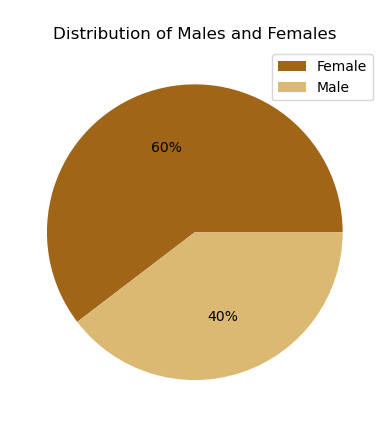

In [257]:
# Plot a pie chart of the GENDER column distribution

plt.pie(df_main.GENDER.value_counts(normalize=True), autopct='%.0f%%', colors=sns.color_palette('BrBG'))
plt.title('\nDistribution of Males and Females')
plt.legend(['Female', 'Male'])
plt.show()

#### EDUCATION column

In [26]:
# Check the values in the EDUCATION column

df_main.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [299]:
# Decode the protos in EDUCATION field to the appropriate names

edu_dict = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others',
            5: 'Unknown5', 6: 'Unknown6', 0: 'Unknown0'}

df_main.EDUCATION = df_main.EDUCATION.map(lambda x: edu_dict[x])
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT,PMT_SHORTAGE_SEP,PMT_SHORTAGE_AUG,PMT_SHORTAGE_JUL,PMT_SHORTAGE_JUN,PMT_SHORTAGE_MAY,PMT_SHORTAGE_APR,AGE_GROUP
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,University,1,24,2,2,-1,-1,-2,...,0,0,1,3913,2413,689,0,0,0,21 - 30
2,120000,2,University,2,26,-1,2,0,0,0,...,0,2000,1,2682,725,1682,2272,3455,1261,21 - 30
3,90000,2,University,2,34,0,0,0,0,0,...,1000,5000,0,27721,12527,12559,13331,13948,10549,31 - 40
4,50000,2,University,1,37,0,0,0,0,0,...,1069,1000,0,44990,46214,48091,27214,27890,28547,31 - 40
5,50000,1,University,1,57,-1,0,-1,0,0,...,689,679,0,6617,-31011,25835,11940,18457,18452,51 - 60


In [300]:
# Verify the updated the values in the EDUCATION column

df_main.EDUCATION.value_counts()

University         14030
Graduate School    10585
High School         4917
Unknown5             280
Others               123
Unknown6              51
Unknown0              14
Name: EDUCATION, dtype: int64

In [301]:
# Check the percentage of different values in the EDUCATION 

df_main.EDUCATION.value_counts(normalize=True)

University         0.467667
Graduate School    0.352833
High School        0.163900
Unknown5           0.009333
Others             0.004100
Unknown6           0.001700
Unknown0           0.000467
Name: EDUCATION, dtype: float64

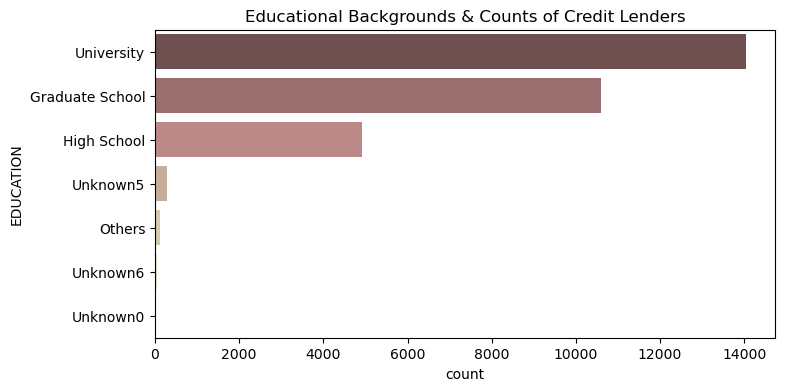

In [302]:
# Create a horizontal barplot of Educational Qualifications credit lenders

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(y='EDUCATION', data=df_main, ax=ax, palette='pink')
# plt.ylabel(df_main['EDUCATION'])
plt.title('Educational Backgrounds & Counts of Credit Lenders')
plt.show()

#### MARITAL_STATUS column

In [31]:
# Check the values in the MARITAL_STATUS column

df_main.MARITAL_STATUS.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARITAL_STATUS, dtype: int64

In [32]:
# Decode the protos in MARITAL_STATUS field to the appropriate names

# Create a function that converts the code to values
def decode_marriage(x):
    if x == 1:
        return 'Married'
    elif x == 2:
        return 'Single'
    elif x == 3:
        return 'Others'
    else:
        return 'Unknown0'

# Apply the above function to the GENDER column
df_main.MARITAL_STATUS = df_main.MARITAL_STATUS.apply(decode_marriage)
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT,PMT_SHORTAGE_SEP,PMT_SHORTAGE_AUG,PMT_SHORTAGE_JUL,PMT_SHORTAGE_JUN,PMT_SHORTAGE_MAY,PMT_SHORTAGE_APR,AGE_GROUP
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,1,3913,2413,689,0,0,0,21 - 30
2,120000,Female,University,Single,26,-1,2,0,0,0,...,0,2000,1,2682,725,1682,2272,3455,1261,21 - 30
3,90000,Female,University,Single,34,0,0,0,0,0,...,1000,5000,0,27721,12527,12559,13331,13948,10549,31 - 40
4,50000,Female,University,Married,37,0,0,0,0,0,...,1069,1000,0,44990,46214,48091,27214,27890,28547,31 - 40
5,50000,Male,University,Married,57,-1,0,-1,0,0,...,689,679,0,6617,-31011,25835,11940,18457,18452,51 - 60


In [33]:
# Verify the updated the values in the MARITAL_STATUS column

df_main.MARITAL_STATUS.value_counts()

Single      15964
Married     13659
Others        323
Unknown0       54
Name: MARITAL_STATUS, dtype: int64

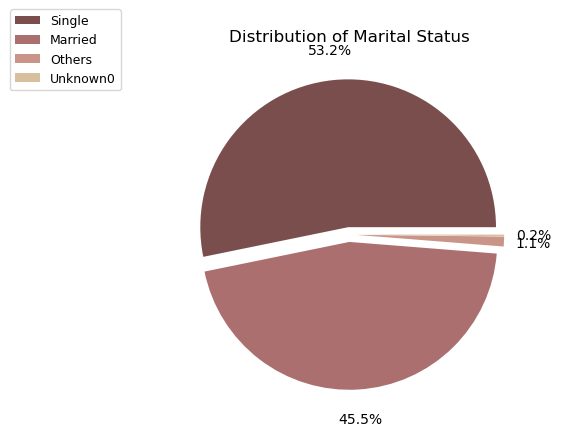

In [270]:
# Create a horizontal barplot of Educational Qualifications credit lenders

pie = plt.pie(df_main.MARITAL_STATUS.value_counts(normalize=True), 
              explode=[0.05]*4, autopct='%.01f%%', pctdistance=1.2,
              colors=sns.color_palette('pink'))
plt.title('Distribution of Marital Status')
plt.legend(['Single', 'Married', 'Others', 'Unknown0'], 
           loc='center right', bbox_to_anchor=(-0.1, 1.), fontsize=9)
plt.show()

#### CREDIT_LIMIT column

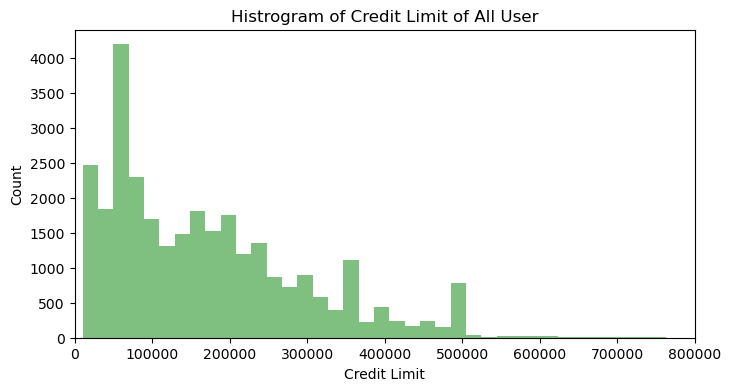

In [305]:
# Histogram of the Credit Limits

plt.figure(figsize=(8, 4))
plt.hist(df_main['CREDIT_LIMIT'], bins= 50, alpha=0.5, color='green')
plt.xlim(0,800000)
plt.xlabel("Credit Limit")
plt.ylabel("Count")
plt.title('Histrogram of Credit Limit of All User')
plt.show()

In [54]:
# Check the Minimum and Maximum Credit Limits offered by the Bank

min_crdt = df_main.CREDIT_LIMIT.min()
max_crdt = df_main.CREDIT_LIMIT.max()

print(f'Minimum Credit Limit: {str(min_crdt)} \nMaximum Credit Limit: {str(max_crdt)}')

Minimum Credit Limit: 10000 
Maximum Credit Limit: 1000000


In [55]:
# Describe the Credit Limit column

df_main.CREDIT_LIMIT.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: CREDIT_LIMIT, dtype: float64

#### AGE column

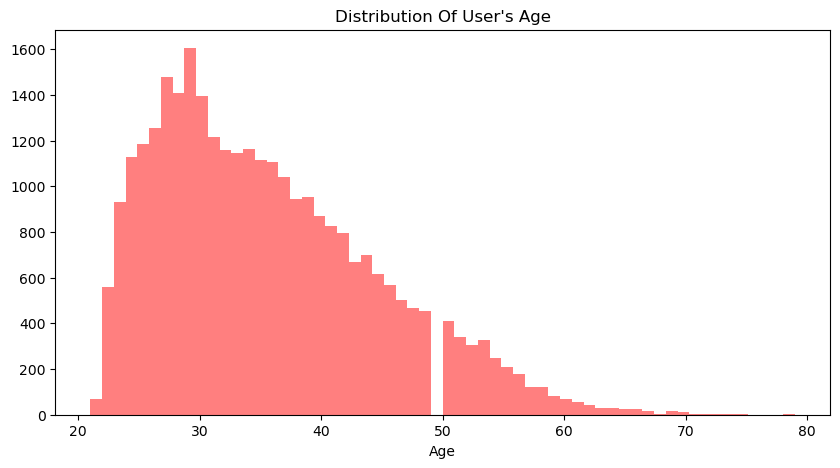

In [243]:
# Histogram of the distribution of AGE of the credit lenders

plt.figure(figsize=(10, 5))
plt.hist(df_main['AGE'], bins= 60, alpha=0.5, color='red')
plt.title("Distribution Of User's Age")
plt.xlabel('Age')
plt.show()

#### IS_DEFAULT column

In [59]:
# Check how many users have defaulted payments in the dataframe

df_main.IS_DEFAULT.value_counts(ascending=True)

1     6636
0    23364
Name: IS_DEFAULT, dtype: int64

In [60]:
# Check how many percentage users have defaulted payments in the dataframe

df_main.IS_DEFAULT.value_counts(normalize=True, ascending=True)

1    0.2212
0    0.7788
Name: IS_DEFAULT, dtype: float64

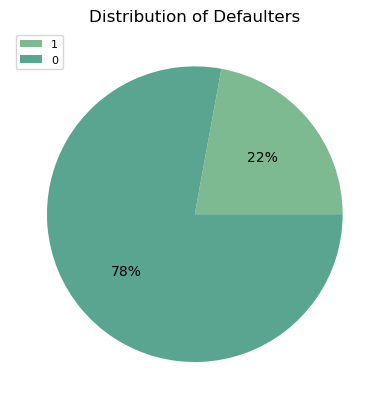

In [72]:
# Create a horizontal barplot of Educational Qualifications credit lenders

plt.pie(df_main.IS_DEFAULT.value_counts(normalize=True, ascending=True), 
        autopct='%.0f%%', 
        colors=sns.color_palette('crest'))
plt.title('Distribution of Defaulters')
plt.legend(df_main.IS_DEFAULT.unique(), fontsize=8)
plt.show()

### Bill Statement Fields

### Plot the distribution of CREDIT_LIMITS of each GENDER category

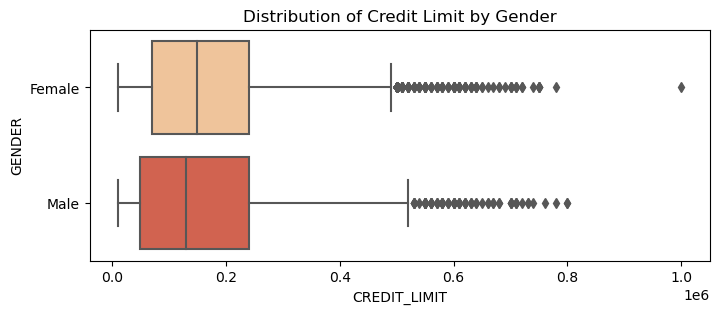

In [146]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df_main["CREDIT_LIMIT"], y=df_main["GENDER"], palette="OrRd")
ax.set_xlim(0,900000)
plt.title('Distribution of Credit Limit by Gender')
plt.show()

### Plot the distribution of CREDIT_LIMITS of each EDUCATION category

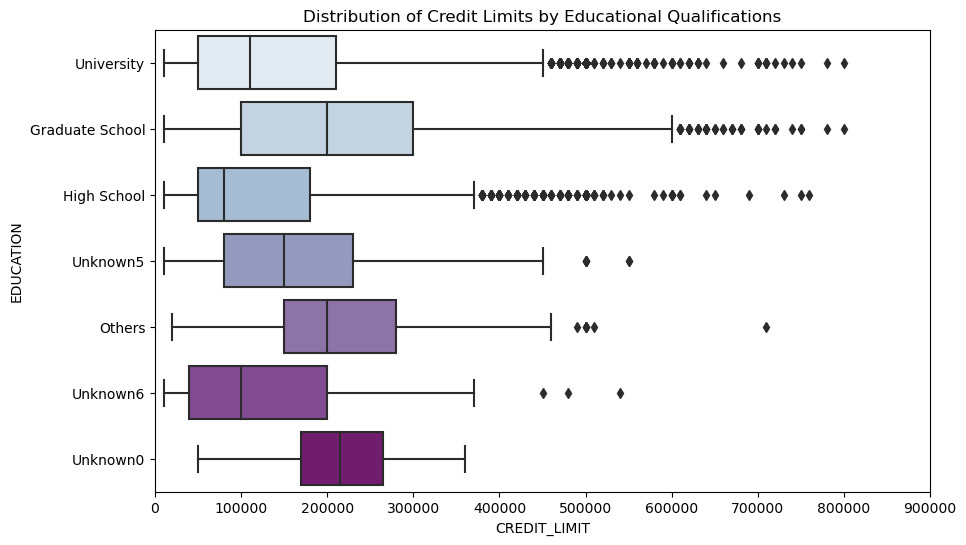

In [152]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=df_main["EDUCATION"], x=df_main["CREDIT_LIMIT"], palette="BuPu")
plt.title('Distribution of Credit Limits by Educational Qualifications')
ax.set_xlim(0,900000)
plt.show()

### Plot the distribution of CREDIT_LIMITS of each MARITAL_STATUS category

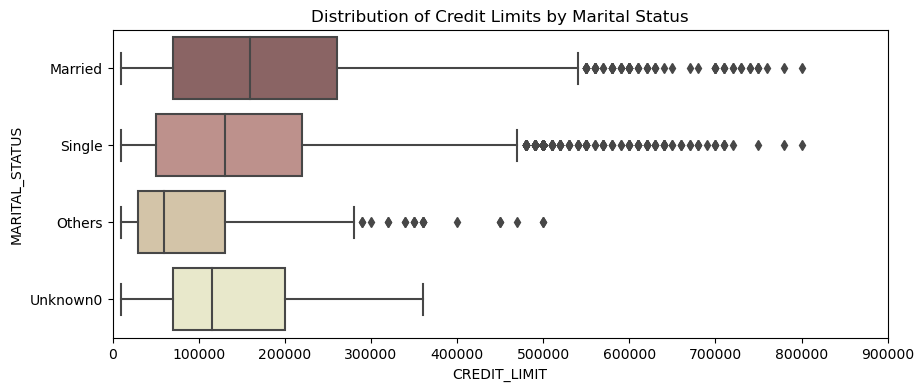

In [169]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(y=df_main["MARITAL_STATUS"], x=df_main["CREDIT_LIMIT"], palette='pink')
plt.title('Distribution of Credit Limits by Marital Status')
ax.set_xlim(0,900000)
plt.show()

## Average Statement Amount of All Users Over Months

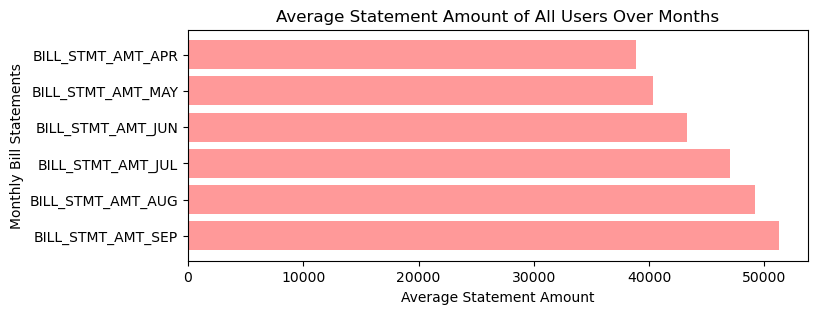

In [282]:
bill_means = df_main[['BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL', 
                     'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR']].mean(axis=0)


plt.figure(figsize=(8,3))
plt.barh(y= bill_means.keys(), width=bill_means, color='red', alpha=0.4)
plt.title('Average Statement Amount of All Users Over Months')
plt.xlabel('Average Statement Amount')
plt.ylabel('Monthly Bill Statements')
plt.show()

# PROJECT 2

In [16]:
# Add AGE_GROUPS field using the AGE column

bins= [21, 31, 41, 51, 61, 71, 81]
labels = ['21 - 30','31 - 40','41 - 50','51 - 60','61 - 70', '71 - 80']

df_raw['AGE_GROUP'] = pd.cut(df_raw['AGE'], bins=bins, labels=labels, right=False)
df_raw.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT,PMT_SHORTAGE_SEP,PMT_SHORTAGE_AUG,PMT_SHORTAGE_JUL,PMT_SHORTAGE_JUN,PMT_SHORTAGE_MAY,PMT_SHORTAGE_APR,AGE_GROUP
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,3913,2413,689,0,0,0,21 - 30
2,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,2682,725,1682,2272,3455,1261,21 - 30
3,90000,2,2,2,34,0,0,0,0,0,...,1000,5000,0,27721,12527,12559,13331,13948,10549,31 - 40
4,50000,2,2,1,37,0,0,0,0,0,...,1069,1000,0,44990,46214,48091,27214,27890,28547,31 - 40
5,50000,1,2,1,57,-1,0,-1,0,0,...,689,679,0,6617,-31011,25835,11940,18457,18452,51 - 60


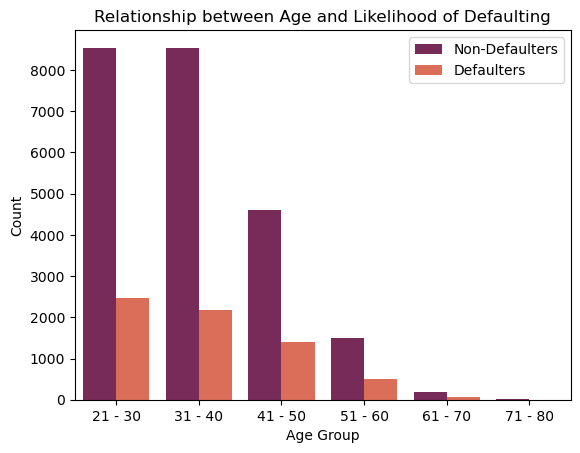

In [181]:
df_main = df_raw.copy()

sns.countplot(x="AGE_GROUP", hue="IS_DEFAULT", data=df_main, palette='rocket')
plt.title("Relationship between Age and Likelihood of Defaulting")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(['Non-Defaulters', 'Defaulters'])
plt.show() 

## Credit limit for non-defaulters and defaulters

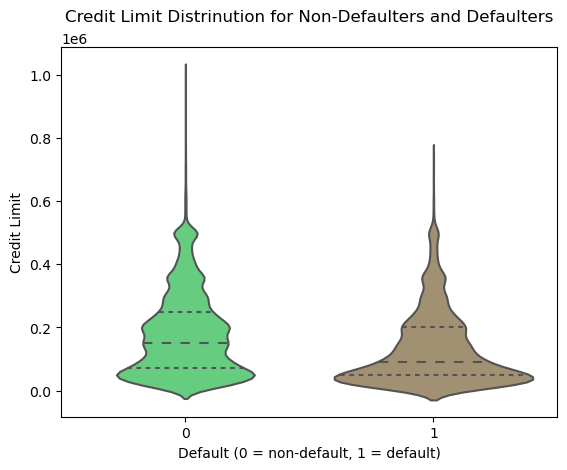

In [293]:
sns.violinplot(data=df_main, x="IS_DEFAULT", y="CREDIT_LIMIT", inner="quartile", palette='terrain')
plt.title("Credit Limit Distrinution for Non-Defaulters and Defaulters\n")
plt.xlabel("Default (0 = non-default, 1 = default)")
plt.ylabel("Credit Limit")
plt.show()

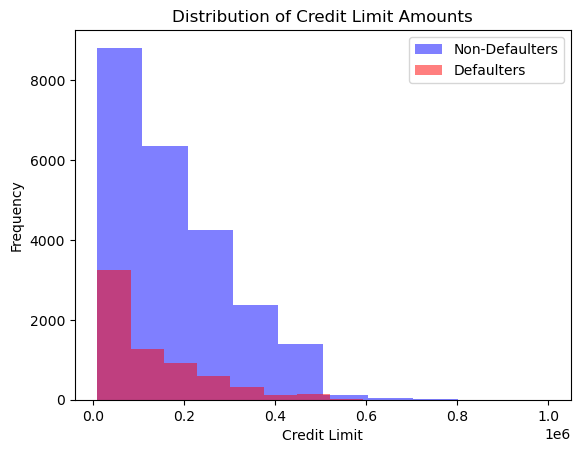

In [197]:
# Separate credit limit data for defaulters and non-defaulters
credit_limit_nondefault = df_main[df_main['IS_DEFAULT']==0]['CREDIT_LIMIT']
credit_limit_default = df_main[df_main['IS_DEFAULT']==1]['CREDIT_LIMIT']

# Create a histogram
plt.hist(credit_limit_nondefault, alpha=0.5, label='Non-Defaulters', color='blue')
plt.hist(credit_limit_default, alpha=0.5, label='Defaulters', color='red')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title("Distribution of Credit Limit Amounts")
plt.show()

In [15]:
# Add new features to show the shortage in the amoount paid by the user compared to the Bill Amount.

short_suffix = 'PMT_SHORTAGE_'
bill_suffix = 'BILL_STMT_AMT_'
pay_suffix = 'PAY_AMT_'

df_raw[f"{short_suffix}{'SEP'}"] = df_raw[f"{bill_suffix}{'SEP'}"] - df_raw[f"{pay_suffix}{'SEP'}"]
df_raw[f"{short_suffix}{'AUG'}"] = df_raw[f"{bill_suffix}{'AUG'}"] - df_raw[f"{pay_suffix}{'AUG'}"]
df_raw[f"{short_suffix}{'JUL'}"] = df_raw[f"{bill_suffix}{'JUL'}"] - df_raw[f"{pay_suffix}{'JUL'}"]
df_raw[f"{short_suffix}{'JUN'}"] = df_raw[f"{bill_suffix}{'JUN'}"] - df_raw[f"{pay_suffix}{'JUN'}"]
df_raw[f"{short_suffix}{'MAY'}"] = df_raw[f"{bill_suffix}{'MAY'}"] - df_raw[f"{pay_suffix}{'MAY'}"]
df_raw[f"{short_suffix}{'APR'}"] = df_raw[f"{bill_suffix}{'APR'}"] - df_raw[f"{pay_suffix}{'APR'}"]

df_raw.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT,PMT_SHORTAGE_SEP,PMT_SHORTAGE_AUG,PMT_SHORTAGE_JUL,PMT_SHORTAGE_JUN,PMT_SHORTAGE_MAY,PMT_SHORTAGE_APR
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,3913,2413,689,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,2682,725,1682,2272,3455,1261
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,27721,12527,12559,13331,13948,10549
4,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,44990,46214,48091,27214,27890,28547
5,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,6617,-31011,25835,11940,18457,18452


### Bill Statement Fields

In [77]:
bill_cols =['BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL', 
            'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR']

bills = df_main[bill_cols]
bills.describe()

,BILL_STMT_AMT_SEP,BILL_STMT_AMT_AUG,BILL_STMT_AMT_JUL,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


### Payment Amount Fields

In [78]:
payment_cols = ['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 
                'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

payments = df_main[payment_cols]

payments.describe()

,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Short Payment Fields

In [79]:
shortpay_cols = ['PMT_SHORTAGE_SEP', 'PMT_SHORTAGE_AUG', 'PMT_SHORTAGE_JUL', 
                 'PMT_SHORTAGE_JUN', 'PMT_SHORTAGE_MAY', 'PMT_SHORTAGE_APR']

shortpayments = df_main[shortpay_cols]

shortpayments.describe()

,PMT_SHORTAGE_SEP,PMT_SHORTAGE_AUG,PMT_SHORTAGE_JUL,PMT_SHORTAGE_JUN,PMT_SHORTAGE_MAY,PMT_SHORTAGE_APR
count,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35512.013333,33656.257833
std,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60553.370054,60151.290836
min,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-414380.000000,-684896.000000
25%,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000
50%,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15538.000000,13926.500000
75%,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46961.500000,46067.250000
max,913727.000000,9.332080e+05,1.542258e+06,841586.00000,877171.000000,911408.000000


### Plot the Differences in Mean, Median for the Bill Statement Fields

In [90]:
bill_sep = df_main[['BILL_STMT_AMT_SEP']]
bill_sep.insert(0, 'bill_month', 'BILL_STMT_AMT_SEP')
bill_sep.rename(columns={'BILL_STMT_AMT_SEP': 'value'}, inplace=True)

bill_aug = df_main[['BILL_STMT_AMT_AUG']]
bill_aug.insert(0, 'bill_month', 'BILL_STMT_AMT_AUG')
bill_aug.rename(columns={'BILL_STMT_AMT_AUG': 'value'}, inplace=True)

bill_jul = df_main[['BILL_STMT_AMT_JUL']]
bill_jul.insert(0, 'bill_month', 'BILL_STMT_AMT_JUL')
bill_jul.rename(columns={'BILL_STMT_AMT_JUL': 'value'}, inplace=True)

bill_jun = df_main[['BILL_STMT_AMT_JUN']]
bill_jun.insert(0, 'bill_month', 'BILL_STMT_AMT_JUN')
bill_jun.rename(columns={'BILL_STMT_AMT_JUN': 'value'}, inplace=True)

bill_may = df_main[['BILL_STMT_AMT_MAY']]
bill_may.insert(0, 'bill_month', 'BILL_STMT_AMT_MAY')
bill_may.rename(columns={'BILL_STMT_AMT_MAY': 'value'}, inplace=True)

bill_apr = df_main[['BILL_STMT_AMT_APR']]
bill_apr.insert(0, 'bill_month', 'BILL_STMT_AMT_APR')
bill_apr.rename(columns={'BILL_STMT_AMT_APR': 'value'}, inplace=True)

total_bill_12 = pd.concat([bill_sep, bill_aug]).reset_index(drop=True)
total_bill_22 = pd.concat([bill_jul, bill_jun]).reset_index(drop=True)
total_bill_32 = pd.concat([bill_may, bill_apr]).reset_index(drop=True)

In [91]:
bills_agg = df_main[bill_cols].agg(['mean', 'median']).T

bills_agg

,mean,median
BILL_STMT_AMT_SEP,51223.330900,22381.5
BILL_STMT_AMT_AUG,49179.075167,21200.0
BILL_STMT_AMT_JUL,47013.154800,20088.5
BILL_STMT_AMT_JUN,43262.948967,19052.0
BILL_STMT_AMT_MAY,40311.400967,18104.5
BILL_STMT_AMT_APR,38871.760400,17071.0


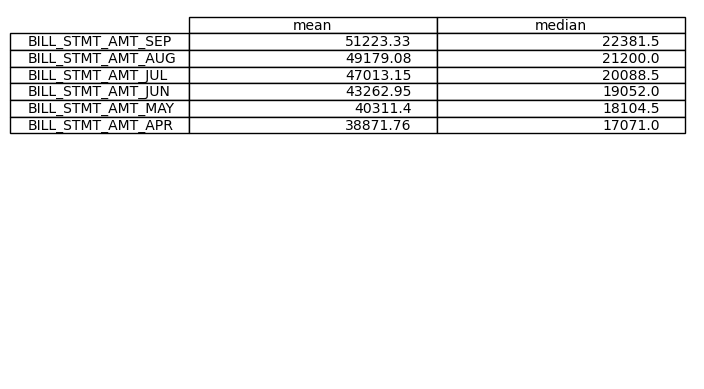

In [92]:
from pandas.plotting import table

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, bills_agg.round(2), loc='upper right')
plt.show()

In [227]:
def hist_plotter(df):
    
    df_g = df.groupby('bill_month').value.agg(['mean', 'median'])

    g = sns.displot(
        data= df, x='value',
        col='bill_month',  bins = 50,
        facet_kws=dict(sharey=True, sharex=False))
    
    
    axes = g.axes.flatten()

    # iterate through each axes
    for ax in axes:
        # extract the species name
        spec = ax.get_title().split(' = ')[1]

        # select the data for the species
        data = df_g.loc[spec, :]

        # print data as needed or comment out
        print(data)

        # plot the lines
        ax.axvline(x=data['mean'], c='k', ls='-', lw=1.25)
        ax.axvline(x=data['median'], c='orange', ls='--', lw=1.25)
        plt.legend(['Mean', 'Median'])

mean      51223.3309
median    22381.5000
Name: BILL_STMT_AMT_SEP, dtype: float64
mean      49179.075167
median    21200.000000
Name: BILL_STMT_AMT_AUG, dtype: float64


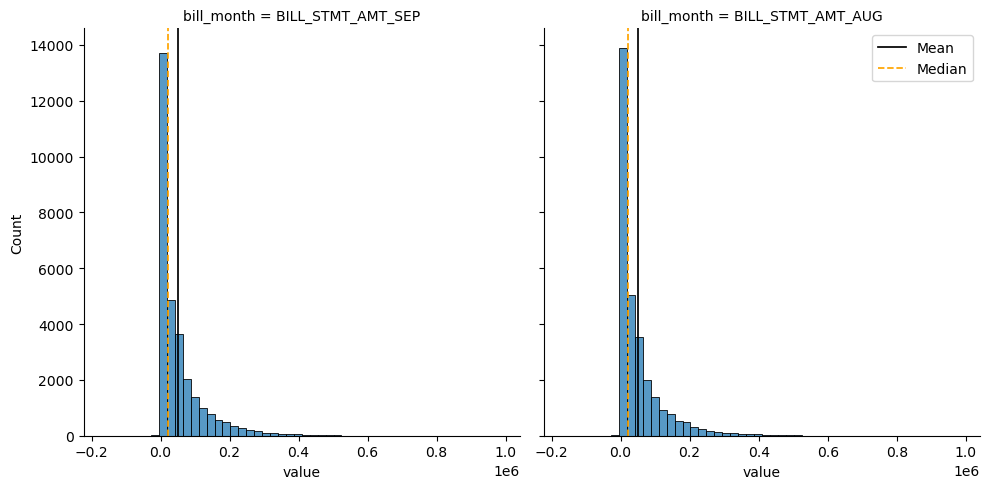

In [228]:
hist_plotter(total_bill_12)

mean      47013.1548
median    20088.5000
Name: BILL_STMT_AMT_JUL, dtype: float64
mean      43262.948967
median    19052.000000
Name: BILL_STMT_AMT_JUN, dtype: float64


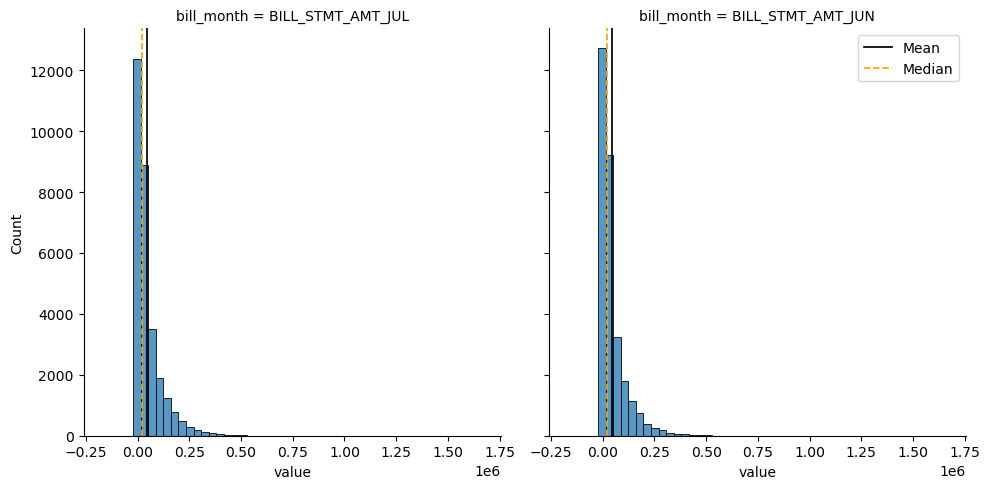

In [229]:
hist_plotter(total_bill_22)

mean      40311.400967
median    18104.500000
Name: BILL_STMT_AMT_MAY, dtype: float64
mean      38871.7604
median    17071.0000
Name: BILL_STMT_AMT_APR, dtype: float64


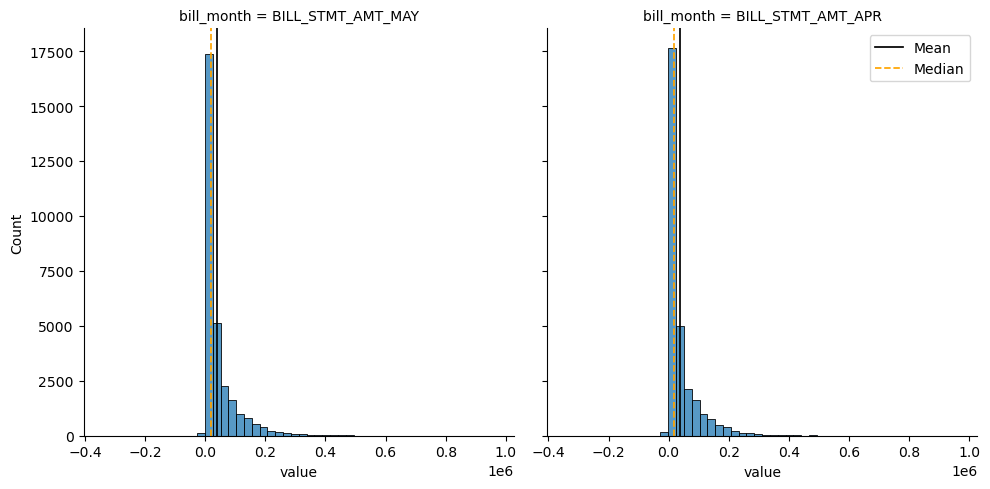

In [230]:
hist_plotter(total_bill_32)

### Visualize Outliers for Bill Statement Fields

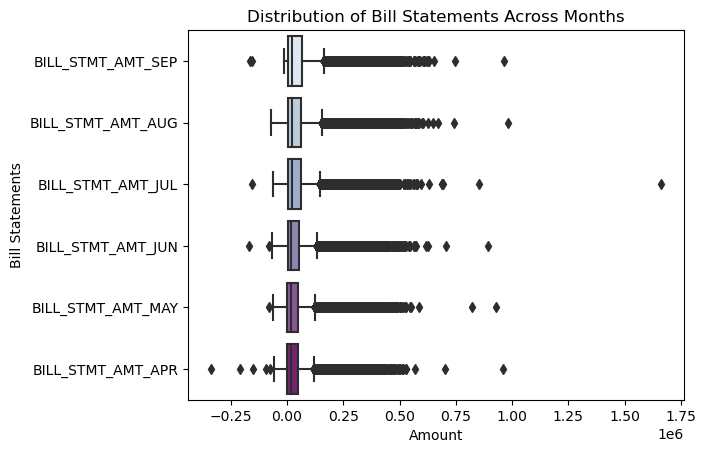

In [236]:
sns.boxplot(y="variable", x="value", data=pd.melt(df_main[bill_cols]), palette='BuPu')
plt.xlabel("Amount")
plt.ylabel("Bill Statements")
plt.title("Distribution of Bill Statements Across Months")
plt.show()

In [237]:
def remove_outliers(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit  = Q1 - 1.5 * IQR
    higher_limit = Q3 + 1.5 * IQR
    
    df_outl_removed = df.loc[(df[col] > lower_limit) & (df[col] < higher_limit)]
    
    return df_outl_removed

In [234]:
df_bill_main_cleaned = df_main.copy()

for i in range(20):
    for month in bill_cols[::-1]:
        df_bill_main_cleaned = remove_outliers(df_bill_main_cleaned, month)
    
df_bill_main_cleaned.shape

(16902, 31)

### Boxplots of Outlier removed Bill Statement Fields

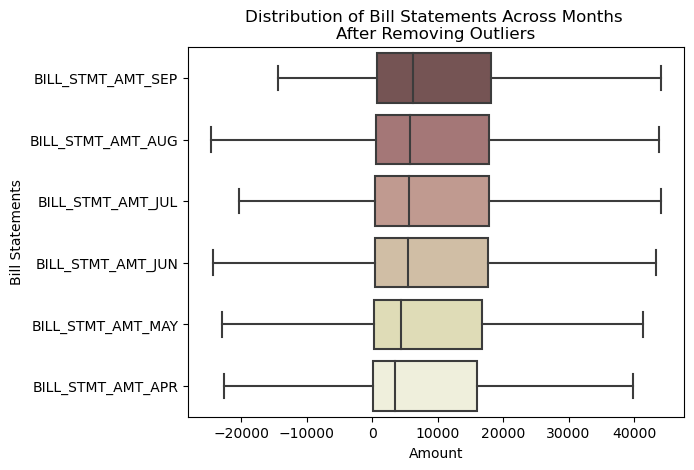

In [242]:
sns.boxplot(y="variable", x="value", 
            data=pd.melt(df_bill_main_cleaned[bill_cols]), 
            palette='pink')
plt.xlabel("Amount")
plt.ylabel("Bill Statements")
plt.title("Distribution of Bill Statements Across Months \nAfter Removing Outliers")
plt.show()

### Find the most correlating features to IS_DEFAULT field.

In [111]:
df_corr = df_raw.copy()

In [283]:
df_raw.columns

Index(['CREDIT_LIMIT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'REPAY_STATUS_SEP', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JUL',
       'REPAY_STATUS_JUN', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR',
       'BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL',
       'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR',
       'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_DEFAULT', 'PMT_SHORTAGE_SEP',
       'PMT_SHORTAGE_AUG', 'PMT_SHORTAGE_JUL', 'PMT_SHORTAGE_JUN',
       'PMT_SHORTAGE_MAY', 'PMT_SHORTAGE_APR', 'AGE_GROUP'],
      dtype='object')

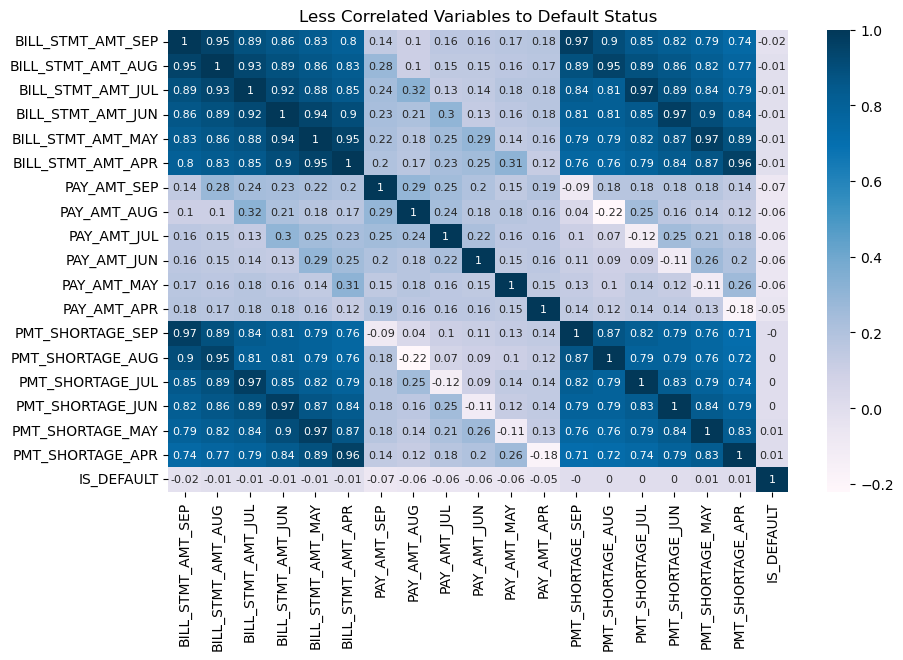

In [290]:
less_corr_vars = ['BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL',
                  'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR',
                  'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
                  'PAY_AMT_MAY', 'PAY_AMT_APR', 'PMT_SHORTAGE_SEP',
                  'PMT_SHORTAGE_AUG', 'PMT_SHORTAGE_JUL', 'PMT_SHORTAGE_JUN',
                  'PMT_SHORTAGE_MAY', 'PMT_SHORTAGE_APR', 'IS_DEFAULT']

plt.figure(figsize=(10, 6))
sns.heatmap(df_raw[less_corr_vars].corr().round(2), annot=True, cmap='PuBu', annot_kws={"fontsize":8})
plt.title("Less Correlated Variables to Default Status")
plt.show()

In [115]:
corr_cols = ['CREDIT_LIMIT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
              'REPAY_STATUS_SEP', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JUL',
               'REPAY_STATUS_JUN', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR', 
             'IS_DEFAULT']

corr = df_corr[corr_cols].corr().round(2)
corr

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,REPAY_STATUS_APR,IS_DEFAULT
CREDIT_LIMIT,1.00,0.02,-0.22,-0.11,0.14,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,-0.15
GENDER,0.02,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,-0.04,-0.04
EDUCATION,-0.22,0.01,1.00,-0.14,0.18,0.11,0.12,0.11,0.11,0.10,0.08,0.03
MARITAL_STATUS,-0.11,-0.03,-0.14,1.00,-0.41,0.02,0.02,0.03,0.03,0.04,0.03,-0.02
AGE,0.14,-0.09,0.18,-0.41,1.00,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,0.01
REPAY_STATUS_SEP,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.32
REPAY_STATUS_AUG,-0.30,-0.07,0.12,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.26
REPAY_STATUS_JUL,-0.29,-0.07,0.11,0.03,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.24
REPAY_STATUS_JUN,-0.27,-0.06,0.11,0.03,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.22
REPAY_STATUS_MAY,-0.25,-0.06,0.10,0.04,-0.05,0.51,0.62,0.69,0.82,1.00,0.82,0.20


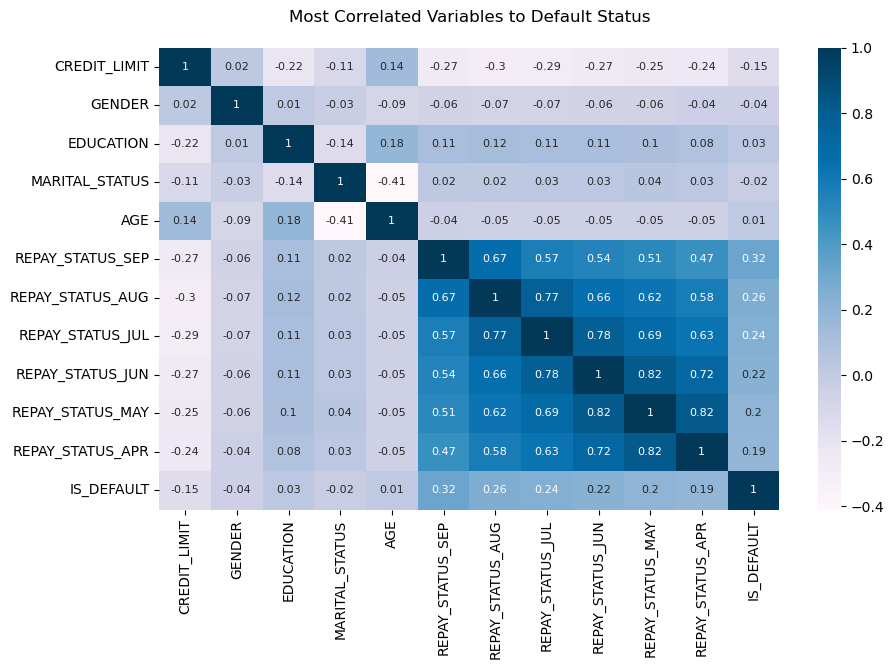

In [292]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='PuBu', annot_kws={"fontsize":8})
plt.title("Most Correlated Variables to Default Status\n")
plt.show()